In [120]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy.spatial.distance import  euclidean 

In [121]:
def distance(a,b):
    #dist = sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))]) ** 0.5
    #return dist 
    return euclidean(a,b)


In [122]:
print(torch.cuda.is_available())

True


어떤 이미지를 출력하시겠습니까?
0 2or4objects.jpg
1 7apples.jpg
2 variableObjects.jpeg
3 2apples.jpg
4 colors.jpg


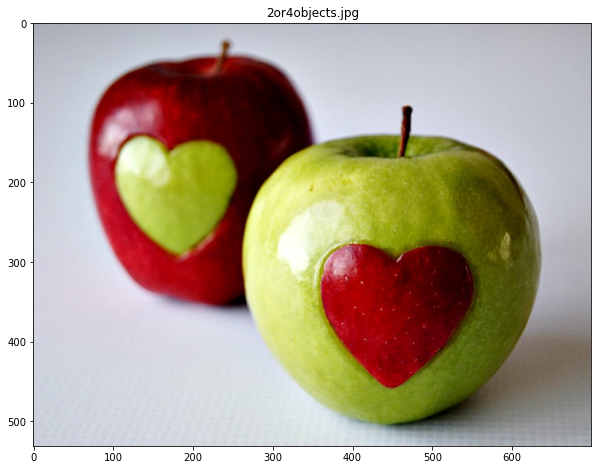

In [123]:
PATH = '/home/sumin/Documents/robot_vision/image'
images = os.listdir(PATH)
print('어떤 이미지를 출력하시겠습니까?')
for cnt, name in enumerate(images):
    print(cnt, name)
cnt = int(input())
image = cv2.imread(f'{PATH}/{images[cnt]}')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.title(f'{images[cnt]}')
plt.imshow(image)
plt.show()


In [124]:
k = int(input("k를 입력해주시길 바랍니다."))
if torch.cuda.is_available():

    device = 'cuda'

else:

    device = 'cpu'

In [128]:

image = cv2.imread(f'{PATH}/{images[cnt]}')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_image = np.zeros_like(image)
image =torch.from_numpy(image)
data = torch.reshape(image, (-1,3)).type(torch.float32)

center_b=torch.randint(0,255,(k,)) 
center_g=torch.randint(0,255,(k,))
center_r=torch.randint(0,255,(k,))
center = torch.Tensor(list(zip(center_b,center_g,center_r)))

center_old = torch.zeros_like(center)
labels = torch.zeros(len(data[:,0]))
error = torch.zeros(k)

for i in range(len(error)):
    error[i] = i+1

while (error.all() != 0):
    for i in range(len(data[:,0])):
        distances = torch.zeros(k)
        for j in range(k):
            distances[j] = distance(data[i], center[j])
        cluster = torch.argmin(distances)
        labels[i] = cluster 

    center_old = center

    points= []
    for i in tqdm(range(k)):
        points = [data[j] for j in range(len(data)) if labels[j] == i]
        
        pt = torch.stack(points)
        if len(pt) >1:
            center[i] =torch.mean(pt)
        
    print(center)
    
    for i in range(k):
        error[i] = distance(center_old[i],center[i])

    #center = center.tolist()
    #labels = labels.tolist()
for i in range(k):
    y = int(i/image.shape[1])
    x = i%image.shape[1]
    result_image[y][x] = (int(center[int(labels[i])][0]),int(center[int(labels[i])][1]),int(center[int(labels[i])][2]))

print((int(center[int(labels[i])][0]),int(center[int(labels[i])][1]),int(center[int(labels[i])][2])))
cv2.imshow("Result", result_image)
cv2.waitKey(0)


NameError: name 'tqdm' is not defined

tensor([[197.,  70.,   8.],
        [199., 143., 168.],
        [ 10., 204., 200.],
        [ 76., 246., 108.]])


/tmp/ipykernel_35246/2362443933.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm


어떤 이미지를 출력하시겠습니까?
0 2or4objects.jpg
1 7apples.jpg
2 variableObjects.jpeg
3 2apples.jpg
4 colors.jpg


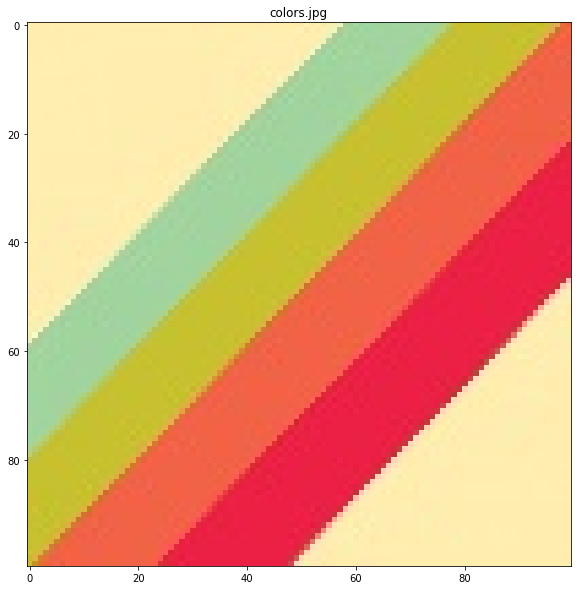

[[130.  72.  61.]
 [183. 238. 108.]
 [222. 161. 238.]
 [127. 224. 157.]]


In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from scipy.spatial.distance import  euclidean 
from tqdm._tqdm_notebook import tqdm

def distance(a,b):
    dist = sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))]) ** 0.5
    return dist 
    #return euclidean(a,b)

k = int(input("k를 입력해주시길 바랍니다."))
if torch.cuda.is_available():
    device = 'cuda'

else:
    device = 'cpu'

PATH = '/home/sumin/Documents/robot_vision/image'
images = os.listdir(PATH)
print('어떤 이미지를 출력하시겠습니까?')
for cnt, name in enumerate(images):
    print(cnt, name)
cnt = int(input())
image = cv2.imread(f'{PATH}/{images[cnt]}')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cv2.imshow('image',image)
#cv2.waitKey(0)
plt.figure(figsize=(10,10))
plt.title(f'{images[cnt]}')
plt.imshow(image)
plt.show()

#image = cv2.imread(f'{PATH}/{images[cnt]}')

result_image = np.zeros_like(image)
image =torch.from_numpy(image)
data = torch.reshape(image, (-1,3)).type(torch.float32)

center_b=torch.randint(0,255,(k,))
center_g=torch.randint(0,255,(k,))
center_r=torch.randint(0,255,(k,))
center = torch.Tensor(list(zip(center_b,center_g,center_r)))
center_old = torch.zeros_like(center)
labels = torch.zeros(len(data[:,0]))
error = torch.zeros(k)

for i in range(len(error)):
    error[i] = i+1

while (error.all() != 0):
    for i in range(len(data[:,0])):
        distances = torch.zeros(k)
        for j in range(k):
            distances[j] = distance(data[i], center[j])
        cluster = torch.argmin(distances)
        labels[i] = cluster 

    center_old = center
    
   
    center = center.numpy()

    for i in range(k):
        
        for j in range(len(data)):
            points =[]
            if labels[j] ==i:
                points.append(data[j])
        #if points:
        #    pt = torch.stack(points)
        #else:
        #    pt = torch.tensor([])
        #
        #print(points)
        #pt = pt.numpy()
        #import pdb; pdb.set_trace();
        for j in range(len(points)):
            points[j] = points[j].tolist()
        
        
        
        if len(points) >1:
            center[i] =np.mean(points , axis = 0)
        
    print(center)
    
    for i in range(k):
        error[i] = distance(center_old[i],center[i])

    #center = center.tolist()
    #labels = labels.tolist()
for i in range(len(labels)):
    y = int(i/image.shape[1])
    x = i%image.shape[1]
    result_image[y][x] = (int(center[int(labels[i])][0]),int(center[int(labels[i])][1]),int(center[int(labels[i])][2]))

#print((int(center[int(labels[i])][0]),int(center[int(labels[i])][1]),int(center[int(labels[i])][2])))
#result_image =cv2.cvtColor(result_image, cv2.COLOR_GRAY2BGR)
#cv2.imshow("Result", result_image)
#cv2.waitKey(0)

        

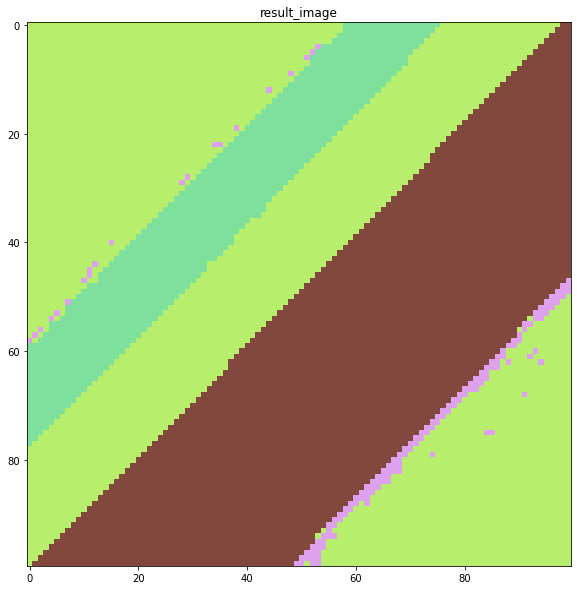

In [4]:
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title(f'result_image')
plt.imshow(result_image)
plt.show()

In [50]:
pt

NameError: name 'pt' is not defined

In [71]:


from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

In [72]:
print(result_image[0])

[[253 253 253]
 [253 253 253]
 [253 253 253]
 ...
 [253 253 253]
 [253 253 253]
 [253 253 253]]


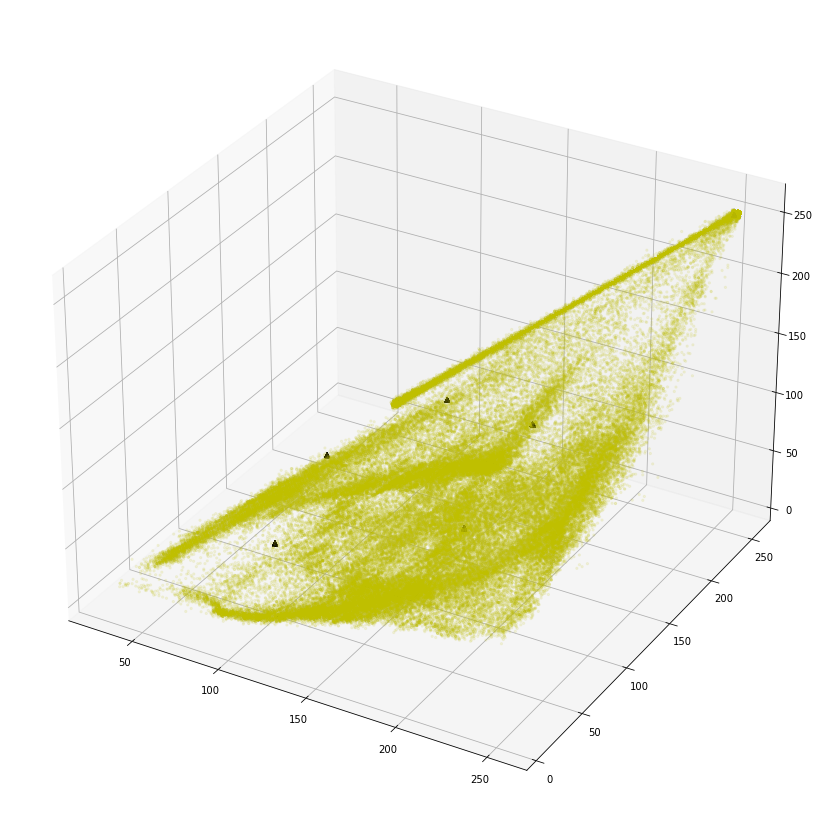

In [73]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
r, g, b = cv2.split(image.numpy())


ax.scatter(r.flatten(),g.flatten(),b.flatten(),c='y' ,alpha = 0.1, marker ='.')
r_, g_, b_ = cv2.split(result_image)


ax.scatter(r_.flatten(),g_.flatten(),b_.flatten() ,c = 'k', marker ='^')


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
PATH = '/home/sumin/Documents/robot_vision/image'
images = os.listdir(PATH)
print('어떤 이미지를 출력하시겠습니까?')
for cnt, name in enumerate(images):
    print(cnt, name)
cnt = int(input())
image = cv2.imread(f'{PATH}/{images[cnt]}')

mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros_like(image,dtype=np.float64)
fgdModel = np.zeros_like(image,dtype=np.float64)
# Step 1
rect = (50,50,450,290)
cv2.grabCut(image,mask,rect,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_RECT)
cv2.imshow("mask",mask) 
cv2.waitKey(0)
# Step 2
#newmask = cv2.imread('./data/newmask2.png',0)
#mask[newmask == 0] = 0
#mask[newmask == 255] = 1
#cv2.grabCut(image,mask,None,bgdModel,fgdModel,1,cv2.GC_INIT_WITH_MASK)
#mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#img = image*mask2[:,:,np.newaxis]
#plt.imshow(img),plt.colorbar(),plt.show()

어떤 이미지를 출력하시겠습니까?
0 2or4objects.jpg
1 7apples.jpg
2 variableObjects.jpeg
3 2apples.jpg
4 colors.jpg


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/grabcut.cpp:99: error: (-5:Bad argument) _model must have CV_64FC1 type, rows == 1 and cols == 13*componentsCount in function 'GMM'
